# Importing Libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.metrics import accuracy_score,r2_score
import os

In [5]:
os.chdir('C:\Datatrained')

In [6]:
data=pd.read_csv('avocado.csv')

In [7]:
data.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [8]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [9]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [11]:
data['Date']=pd.to_datetime(data['Date'])

In [12]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  year          18249 non-null  int64         
 12  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.8+ MB


In [14]:
data.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0 2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1 2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2 2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3 2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4 2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [15]:
data['year'].unique()

array([2015, 2016, 2017, 2018], dtype=int64)

# Mean Sales Price Distribution across each year

<AxesSubplot:xlabel='year'>

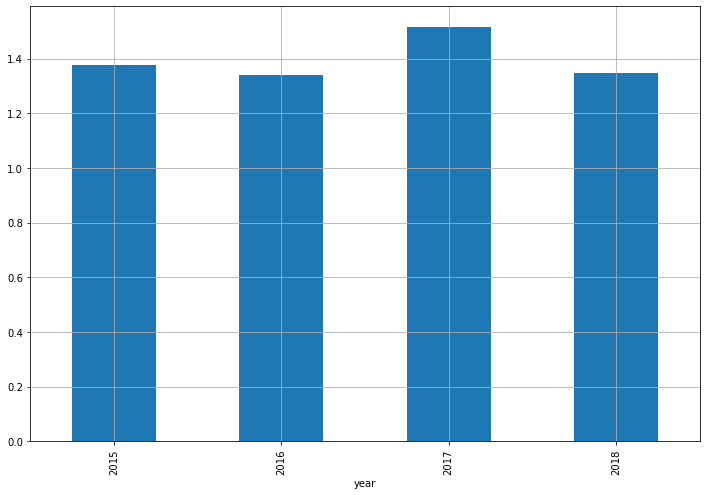

In [16]:
data.groupby('year')['AveragePrice'].mean().plot(kind='bar',grid=True,figsize=(12,8))

# Average Saler Distribution across Region

<AxesSubplot:xlabel='region'>

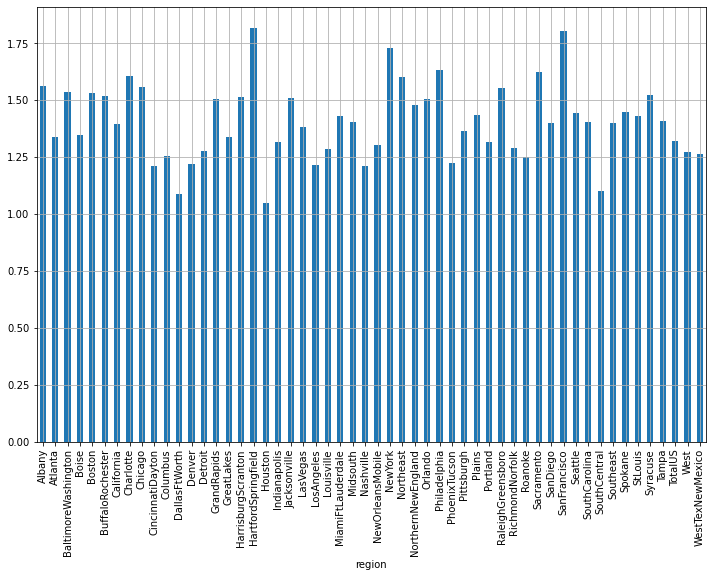

In [17]:
data.groupby('region')['AveragePrice'].mean().plot(kind='bar',grid=True,figsize=(12,8))

In [18]:
data.drop(columns=['Date'],inplace=True)

In [19]:
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8603.62       93.25          0.0  conventional  2015  Albany  
1     9408.07       97.49          0.0  conventional  2015  Albany  
2     8042.21      103.14          0.0  conventional  2015  Albany  
3     5677.40      133.76          0.0  conventional  2015  Albany  
4     5986.26      197.69          0.0  conventional  2015  Albany

# Mean Encoding the categorical variables

In [20]:
def MeanEncoding(data,col,target):
    mpp=data.groupby(col)[target].mean().to_dict()
    data[col]=data[col].map(mpp)
    return data

In [21]:
cat_feat=[i for i in data.columns if data[i].dtype=='O']
cont_feat=[i for i in data.columns if data[i].dtype!='O']

In [22]:
cont_feat.pop(0)

'AveragePrice'

In [23]:
data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [24]:
for i in cat_feat:
    data=MeanEncoding(data,i,'AveragePrice')

In [25]:
data.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags     type  year    region  
0     8603.62       93.25          0.0  1.15804  2015  1.561036  
1     9408.07       97.49          0.0  1.15804  2015  1.561036  
2     8042.21      103.14          0.0  1.15804  2015  1.561036  
3     5677.40      133.76          0.0  1.15804  2015  1.561036  
4     5986.26      197.69          0.0  1.15804  2015  1.561036

# Scaling the features

In [26]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
data[cont_feat]=scaler.fit_transform(data[cont_feat])

In [28]:
data.head()

AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          1.33     -0.227716 -0.230816 -0.199902 -0.212091   -0.234170   
1          1.35     -0.230427 -0.231103 -0.208054 -0.211997   -0.233350   
2          0.93     -0.212085 -0.231007 -0.154478 -0.211325   -0.234730   
3          1.08     -0.223444 -0.230741 -0.185350 -0.211864   -0.237096   
4          1.28     -0.231538 -0.230891 -0.208719 -0.211834   -0.236718   

   Small Bags  Large Bags  XLarge Bags     type      year    region  
0   -0.232647   -0.222352     -0.17558  1.15804 -1.221282  1.561036  
1   -0.231568   -0.222335     -0.17558  1.15804 -1.221282  1.561036  
2   -0.233399   -0.222311     -0.17558  1.15804 -1.221282  1.561036  
3   -0.236568   -0.222186     -0.17558  1.15804 -1.221282  1.561036  
4   -0.236154   -0.221924     -0.17558  1.15804 -1.221282  1.561036

In [29]:
x=data.drop(columns=['AveragePrice'])
y=data['AveragePrice']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=100)

In [32]:
def Prediction(model,x_train,x_test,y_train,y_test):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    score=r2_score(y_pred,y_test)
    return score

# Trying Different Models

In [33]:
logis_score=Prediction(LinearRegression(),x_train,x_test,y_train,y_test)

In [34]:
logis_score

0.17303548775963673

In [35]:
rf_score=Prediction(RandomForestRegressor(),x_train,x_test,y_train,y_test)

In [36]:
rf_score

0.8233744575491095

In [37]:
gb_score=Prediction(GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

In [38]:
gb_score

0.5190967228681556

In [39]:
ada_score=Prediction(AdaBoostRegressor(),x_train,x_test,y_train,y_test)

In [40]:
ada_score

0.21491359664704712

In [41]:
ressult=pd.DataFrame({'Models':['LogisticRegression','Randomforestregressor','GradientBoostingRegressor','AdaBoostRegressor'],
                     'Accuracy':[logis_score,rf_score,gb_score,ada_score]})

# Final Result

In [42]:
ressult

Models  Accuracy
0         LogisticRegression  0.173035
1      Randomforestregressor  0.823374
2  GradientBoostingRegressor  0.519097
3          AdaBoostRegressor  0.214914